# DETECÇÃO DE ANOMALIA

A atividade desta aula consiste na aplicação dos conceitos das aulas anteriores na detecção de anomalia.

A atividade consiste em aplicar um ou mais dos algoritmos não supervisionado vistos no curso no problema de detecção de falha em equipamento sendo monitorado por temporada disponível em: https://www.kaggle.com/datasets/boltzmannbrain/nab


***ALUNA***: Giovana Vieira da Silva

***RA***: 10408509

# Conjunto de Dados - *ec2_request_latency_system_failure.csv*
**Descrição:** Dados de uso da CPU de um servidor em Datacenter da Amazon na Costa Leste. O conjunto de dados termina com falha completa do sistema resultante de uma falha documentada dos servidores da AWS API.


**Contextualizando:** No contexto do conjunto de dados c2_request_latency_system_failure, “timestamp” e “values” podem ser traduzidos da seguinte maneira, enquanto timestamp representa o momento exato em que a latência da  solicitação EC2 foi registrada (cada timestamp é um ponto específico no tempo), os "values" representam a latência da solicitação EC2 em cada timestamp.


**Sobre o conjunto de dados:** Este dataframe contém informações sobre a latência das solicitações EC2 ao longo do tempo, terminando com uma falha completa do sistema devido a uma falha documentada dos servidores da API da AWS.


## Preparando o Ambiente

In [11]:
# Importando bibliotecas

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

### Coleta, Pré-processamento e Tratamento dos Dados

In [2]:
df = pd.read_csv('/content/ec2_request_latency_system_failure.csv')
df.head()

,timestamp,value
0,2014-03-07 03:41:00,45.868
1,2014-03-07 03:46:00,47.606
2,2014-03-07 03:51:00,42.580
3,2014-03-07 03:56:00,46.030
4,2014-03-07 04:01:00,44.992


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [4]:
df.describe()

,value
count,4032.000000
mean,45.155874
std,2.287089
min,22.864000
25%,43.944000
50%,45.017000
75%,46.362000
max,99.248000


In [ ]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [5]:
df.shape

(4032, 2)

In [27]:
# Conversão da variável 'timestamp'
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df['timestamp'].dtypes)

datetime64[ns]


In [28]:
# Normalização dos dados

scaler = StandardScaler()

# Ajustando e transformando os dados
df['value_normalized'] = scaler.fit_transform(df[['value']])
print(df['value_normalized'].describe())

count    4.032000e+03
mean    -1.082027e-15
std      1.000124e+00
min     -9.748040e+00
25%     -5.299416e-01
50%     -6.072816e-02
75%      5.274285e-01
max      2.365401e+01
Name: value_normalized, dtype: float64


## Aplicação de Alogoritmos para Detecção de Anomalias

In [29]:
# Criando o modelo para detecção
model = DBSCAN(eps=0.3, min_samples=5)

# Treinando o modelo
model.fit(df[['value_normalized']])

# Prevendo as anomalias
df['anomaly'] = model.fit_predict(df[['value_normalized']])

#### Visualização das anomalias em forma de clusters

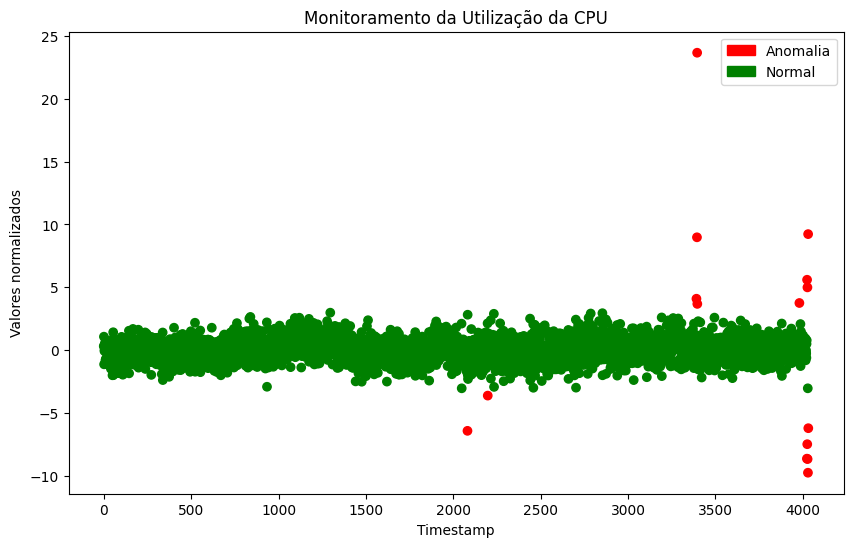

In [30]:
# Criando uma coluna para as cores (verde para pontos normais, vermelho para anomalias)
df['color'] = df['anomaly'].map(lambda x: 'red' if x == -1 else 'green')

# Plotando a série temporal
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['value_normalized'], c=df['color'])

# Criando a legenda
red_patch = mpatches.Patch(color='red', label='Anomalia')
green_patch = mpatches.Patch(color='green', label='Normal')
plt.legend(handles=[red_patch, green_patch])
plt.title('Monitoramento da Utilização da CPU')
plt.xlabel('Timestamp')
plt.ylabel('Valores normalizados')
plt.show()

In [42]:
y_pred = model.fit_predict(df[['value_normalized']])

# Conversão dos rótulos preditos
# Rótulos -1 (ruído/anomalias) são convertidos para 1 (anomalia) e outros para 0 (normal)
y_pred_binary = np.where(y_pred == -1, 1, 0)

# Rótulos verdadeiros
y_true = df['anomaly']

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_true, y_pred_binary)
print("Acurácia do modelo DBSCAN:", acuracia)

Acurácia do modelo DBSCAN: 0.9947916666666666


## **Conclusões**


No contexto atual, uma “anomalia” pode ser interpretada como um comportamento inesperado ou anormal na latência das solicitações EC2  (Amazon EC2), isso pode acontecer devido a várias razões, como falhas no sistema, picos de tráfego, ataques cibernéticos, entre outros.

No gráfico executado acima, os pontos vermelhos representam as anomalias detectadas pelo DBSCAN. Estes são pontos que não se encaixam bem em nenhum dos clusters e, portanto, são considerados anomalias. No contexto do conjunto de dados ec2_request_latency_system_failure, essas anomalias podem indicar períodos onde a latência da solicitação EC2 era anormalmente alta, o que poderia ser um sinal de falha do sistema.

Tendo em vista que esse algoritmo identifica regiões de alta densidade de pontos (clusters) e separá-las por regiões de baixa densidade, os pontos em regiões de baixa densidade podem ser considerados anomalias. Com isso, conclui-se que os períodos onde a latência da solicitação EC2 era anormalmente alta podem ser um sinal de falha do sistema.









